In [1]:
%%capture
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np 
import pandas as pd 

import random
import os
from tqdm import tqdm

import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import librosa.effects as le
import IPython.display as ipd

from tensorflow.image import resize

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize
from tensorflow.keras.models import load_model
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras import layers

from itertools import cycle

import joblib

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
angry = glob(r'/kaggle/input/audio-emotions/Emotions/Angry/*.wav')
angry = sorted(angry)
Disgusted = glob(r'/kaggle/input/audio-emotions/Emotions/Disgusted/*.wav')
Disgusted = sorted(Disgusted)
Fearful = glob(r'/kaggle/input/audio-emotions/Emotions/Fearful/*.wav')
Fearful = sorted(Fearful)
Happy = glob(r'/kaggle/input/audio-emotions/Emotions/Happy/*.wav')
Happy = sorted(Happy)
Neutral = glob(r'/kaggle/input/audio-emotions/Emotions/Neutral/*.wav')
Neutral = sorted(Neutral)
Sad = glob(r'/kaggle/input/audio-emotions/Emotions/Sad/*.wav')
Sad = sorted(Sad)
Suprised = glob(r'/kaggle/input/audio-emotions/Emotions/Suprised/*.wav')
Suprised = sorted(Suprised)

# **Data preprocesssing**

In [5]:
##### angry testing 
angry_train=[]
label_angry=[]
target_shape=(128,128)
with tqdm(total=len(angry)) as pbar:
    for i in range (len(angry)):
        y, sr =librosa.load(angry[i], sr=None)
        y_stretched = le.time_stretch(y, rate=1)
        Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
        Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
        angry_train.append(Mel_spectrogram)
        label_angry.append(0)
        pbar.update(1)
print("heeey")

##### Disgusted testing 
Disgusted_train=[]
label_Disgusted=[]
target_shape=(128,128)
with tqdm(total=len(Disgusted)) as pbar:
    for i in range (len(Disgusted)):
        y, sr =librosa.load(Disgusted[i], sr=None)
        y_stretched = le.time_stretch(y, rate=1)
        Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
        Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
        Disgusted_train.append(Mel_spectrogram)
        label_Disgusted.append(1)
        pbar.update(1)
print("heeeey2")

##### Fearful testing 
Fearful_train=[]
label_Fearful=[]
target_shape=(128,128)
with tqdm(total=len(Fearful)) as pbar:
    for i in range (len(Fearful)):
        y, sr =librosa.load(Fearful[i], sr=None)
        y_stretched = le.time_stretch(y, rate=1)
        Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
        Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
        Fearful_train.append(Mel_spectrogram)
        label_Fearful.append(2)

        pbar.update(1)
print("heeeey3")

##### happy testing 
Happy_train=[]
label_happy=[]
target_shape=(128,128)
with tqdm(total=len(Happy)) as pbar:
    for i in range (len(Happy)):
        y, sr =librosa.load(Happy[i], sr=None)
        y_stretched = le.time_stretch(y, rate=1)
        Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
        Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
        Happy_train.append(Mel_spectrogram)
        label_happy.append(3)
        y_stretched = le.time_stretch(y, rate=1.4)
        Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
        Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
        Happy_train.append(Mel_spectrogram)
        label_happy.append(3)
        pbar.update(1)
print("heeeey4")

##### Neutral testing 
Neutral_train=[]
label_Neutral=[]
target_shape=(128,128)
with tqdm(total=len(Neutral)) as pbar:
    for i in range (len(Neutral)):
        y, sr =librosa.load(Neutral[i], sr=None)
        y_stretched = le.time_stretch(y, rate=1)
        Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
        Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
        Neutral_train.append(Mel_spectrogram)
        label_Neutral.append(4)
        y_stretched = le.time_stretch(y, rate=1)
        Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
        Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
        Neutral_train.append(Mel_spectrogram)
        label_Neutral.append(4)
        pbar.update(1)
print("heeeey5")

##### Sad testing 
Sad_train=[]
label_Sad=[]
target_shape=(128,128)
with tqdm(total=len(Sad)) as pbar:
    for i in range (len(Sad)):
        y, sr =librosa.load(Sad[i], sr=None)
        y_stretched = le.time_stretch(y, rate=1)
        Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
        Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
        Sad_train.append(Mel_spectrogram)
        label_Sad.append(5)
        pbar.update(1)
print("heeeey6")





100%|██████████| 2167/2167 [03:44<00:00,  9.64it/s]


heeey


100%|██████████| 1863/1863 [02:52<00:00, 10.82it/s]


heeeey2


100%|██████████| 2047/2047 [03:04<00:00, 11.12it/s]


heeeey3


100%|██████████| 2167/2167 [06:12<00:00,  5.81it/s]


heeeey4


100%|██████████| 1795/1795 [05:18<00:00,  5.64it/s]


heeeey5


100%|██████████| 2167/2167 [03:47<00:00,  9.53it/s]

heeeey6


In [6]:
crema=glob("/kaggle/input/speech-emotion-recognition-en/Crema/*.wav")

In [7]:
#SAD - sadness;
#ANG - angry;
#DIS - disgust;
#FEA - fear;
#HAP - happy;
#NEU - neutral.


target_emotion1 = "ANG"
target_emotion2 = "SAD"
target_emotion3 = "DIS"
target_emotion4 = "FEA"
target_emotion5 = "HAP"
target_emotion6 = "NEU"


i=0
with tqdm(total=len(crema)) as pbar:
    for filename in crema:
        if target_emotion1 in filename:
            y, sr =librosa.load(crema[i], sr=None)
            y_stretched = le.time_stretch(y, rate=1)
            Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
            Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
            angry_train.append(Mel_spectrogram)
            label_angry.append(0)
            
        elif target_emotion2 in filename:
            y, sr =librosa.load(crema[i], sr=None)
            y_stretched = le.time_stretch(y, rate=1)
            Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
            Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
            Sad_train.append(Mel_spectrogram)
            label_Sad.append(5)
            
            
        elif target_emotion3 in filename:
            y, sr =librosa.load(crema[i], sr=None)
            y_stretched = le.time_stretch(y, rate=1)
            Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
            Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
            Disgusted_train.append(Mel_spectrogram)
            label_Disgusted.append(1)           
            
        elif target_emotion4 in filename:
            y, sr =librosa.load(crema[i], sr=None)
            y_stretched = le.time_stretch(y, rate=1)
            Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
            Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
            Fearful_train.append(Mel_spectrogram)
            label_Fearful.append(2)            
            
        elif target_emotion5 in filename:
            y, sr =librosa.load(crema[i], sr=None)
            y_stretched = le.time_stretch(y, rate=1)
            Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
            Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
            Happy_train.append(Mel_spectrogram)
            label_happy.append(3)            
            y_stretched = le.time_stretch(y, rate=1.3)
            Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
            Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
            Happy_train.append(Mel_spectrogram)
            label_happy.append(3)
            
        elif target_emotion6 in filename:
            y, sr =librosa.load(crema[i], sr=None)
            y_stretched = le.time_stretch(y, rate=1)
            Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
            Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
            Neutral_train.append(Mel_spectrogram)
            label_Neutral.append(4)            
            y_stretched = le.time_stretch(y, rate=1.3)
            Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
            Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
            Neutral_train.append(Mel_spectrogram)
            label_Neutral.append(4)           
            
            
            
        pbar.update(1)

        i=i+1

print("done")

100%|██████████| 7442/7442 [10:47<00:00, 11.49it/s]

done


In [8]:
savee=glob("/kaggle/input/speech-emotion-recognition-en/Savee/*.wav")

In [9]:
#'a' = 'anger'
#'d' = 'disgust'
#'f' = 'fear'
#'h' = 'happiness'
#'n' = 'neutral'
#'sa' = 'sadness'



#SAD - sadness;
#ANG - angry;
#DIS - disgust;
#FEA - fear;
#HAP - happy;
#NEU - neutral.


target_emotion1 = "a"
target_emotion2 = "sa"
target_emotion3 = "d"
target_emotion4 = "f"
target_emotion5 = "h"
target_emotion6 = "n"


i=0
with tqdm(total=len(savee)) as pbar:
    for filename in savee:
        if target_emotion1 in filename:
            y, sr =librosa.load(savee[i], sr=None)
            y_stretched = le.time_stretch(y, rate=1)
            Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
            Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
            angry_train.append(Mel_spectrogram)
            label_angry.append(0)
            
        elif target_emotion2 in filename:
            y, sr =librosa.load(savee[i], sr=None)
            y_stretched = le.time_stretch(y, rate=1)
            Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
            Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
            Sad_train.append(Mel_spectrogram)
            label_Sad.append(5)
            
            
        elif target_emotion3 in filename:
            y, sr =librosa.load(savee[i], sr=None)
            y_stretched = le.time_stretch(y, rate=1)
            Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
            Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
            Disgusted_train.append(Mel_spectrogram)
            label_Disgusted.append(1)           
            
        elif target_emotion4 in filename:
            y, sr =librosa.load(savee[i], sr=None)
            y_stretched = le.time_stretch(y, rate=1)
            Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
            Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
            Fearful_train.append(Mel_spectrogram)
            label_Fearful.append(2)            
            
        elif target_emotion5 in filename:
            y, sr =librosa.load(savee[i], sr=None)
            y_stretched = le.time_stretch(y, rate=1)
            Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
            Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
            Happy_train.append(Mel_spectrogram)
            label_happy.append(3)            
            y_stretched = le.time_stretch(y, rate=1.3)
            Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
            Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
            Happy_train.append(Mel_spectrogram)
            label_happy.append(3)
            
        elif target_emotion6 in filename:
            y, sr =librosa.load(savee[i], sr=None)
            y_stretched = le.time_stretch(y, rate=1)
            Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
            Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
            Neutral_train.append(Mel_spectrogram)
            label_Neutral.append(4)            
            y_stretched = le.time_stretch(y, rate=1.3)
            Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
            Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
            Neutral_train.append(Mel_spectrogram)
            label_Neutral.append(4)           
            
            
            
        pbar.update(1)

        i=i+1

print("done!")

100%|██████████| 480/480 [01:24<00:00,  5.69it/s]

done!


# **Model 1**

In [10]:
exp_train=Happy_train+angry_train+Disgusted_train+Fearful_train+Neutral_train+Sad_train
exp_label=label_happy+label_angry+label_Disgusted+label_Fearful+label_Neutral+label_Sad

for i in range(len(exp_label)):
    if exp_label[i]==1 or exp_label[i]==2 or exp_label[i]==5 :
        exp_label[i]=0

for i in range(len(exp_label)):
    if exp_label[i]==4 or exp_label[i]==3:
        exp_label[i]=1
        
np.array(exp_label)
np.array(exp_train)

combined = list(zip(exp_train,exp_label))
random.shuffle(combined)
exp_train, exp_label = zip(*combined)

print("done!")

done!


In [11]:
labels = to_categorical(exp_label, num_classes=2) 

X_train, X_test, y_train, y_test = train_test_split(exp_train, labels, test_size=0.25, random_state=42)

# Neural network model
input_shape = X_train[0].shape
input_layer = Input(shape=input_shape)
x = Conv2D(16, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
output_layer = Dense(2, activation='softmax')(x)
model = keras.Model(inputs=input_layer, outputs=output_layer)

In [12]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
X_train = tf.stack(X_train)
y_train = tf.stack(y_train)
X_test = tf.stack(X_test)
y_test = tf.stack(y_test)

In [13]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
test_accuracy=model.evaluate(X_test,y_test,verbose=0)

print("\n Accuracy= ",test_accuracy[1])

Epoch 1/10
620/620 [==============================] - 12s 7ms/step - loss: 0.7994 - accuracy: 0.6435 - val_loss: 0.6831 - val_accuracy: 0.7312
Epoch 2/10
620/620 [==============================] - 4s 6ms/step - loss: 0.4921 - accuracy: 0.7633 - val_loss: 0.8248 - val_accuracy: 0.7576
Epoch 3/10
620/620 [==============================] - 4s 6ms/step - loss: 0.4186 - accuracy: 0.8026 - val_loss: 0.7401 - val_accuracy: 0.7858
Epoch 4/10
620/620 [==============================] - 4s 6ms/step - loss: 0.3597 - accuracy: 0.8310 - val_loss: 0.6955 - val_accuracy: 0.7940
Epoch 5/10
620/620 [==============================] - 4s 6ms/step - loss: 0.3304 - accuracy: 0.8587 - val_loss: 0.6178 - val_accuracy: 0.8158
Epoch 6/10
620/620 [==============================] - 4s 6ms/step - loss: 0.2955 - accuracy: 0.8717 - val_loss: 0.6756 - val_accuracy: 0.8371
Epoch 7/10
620/620 [==============================] - 4s 6ms/step - loss: 0.2448 - accuracy: 0.8959 - val_loss: 0.6431 - val_accuracy: 0.8418
Epoch

In [14]:
joblib.dump(model, 'Emotion_Audio_Model.pkl')

['Emotion_Audio_Model.pkl']

# **Model 2**

In [15]:
# Negative 
exp_train_2=angry_train+Disgusted_train+Fearful_train+Sad_train
exp_label_2=label_angry+label_Disgusted+label_Fearful+label_Sad

for i in range(len(exp_label_2)):
    if exp_label_2[i]==5 :
        exp_label_2[i]=3
        
np.array(exp_label_2)
np.array(exp_train_2)


combined = list(zip(exp_train_2,exp_label_2))
random.shuffle(combined)
exp_train_2, exp_label_2 = zip(*combined)

print("done!")

done!


In [16]:
labels_2 = to_categorical(exp_label_2, num_classes=4) 

X_train, X_test, y_train, y_test = train_test_split(exp_train_2, labels_2, test_size=0.25, random_state=42)

# Neural network model
input_shape = X_train[0].shape
input_layer = Input(shape=input_shape)
x = Conv2D(16, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
output_layer = Dense(4, activation='softmax')(x)
model2 = keras.Model(inputs=input_layer, outputs=output_layer)

model2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
X_train = tf.stack(X_train)
y_train = tf.stack(y_train)
X_test = tf.stack(X_test)
y_test = tf.stack(y_test)

In [17]:
model2.fit(X_train, y_train, epochs=7, batch_size=35, validation_data=(X_test, y_test))
test_accuracy=model2.evaluate(X_test,y_test,verbose=0)

print("\n Accuracy= ",test_accuracy[1])

Epoch 1/7
296/296 [==============================] - 4s 7ms/step - loss: 1.7621 - accuracy: 0.4184 - val_loss: 1.2277 - val_accuracy: 0.5226
Epoch 2/7
296/296 [==============================] - 2s 6ms/step - loss: 1.1403 - accuracy: 0.5575 - val_loss: 1.1813 - val_accuracy: 0.5539
Epoch 3/7
296/296 [==============================] - 2s 6ms/step - loss: 1.0417 - accuracy: 0.5772 - val_loss: 1.2539 - val_accuracy: 0.5568
Epoch 4/7
296/296 [==============================] - 2s 6ms/step - loss: 0.9727 - accuracy: 0.6043 - val_loss: 1.0678 - val_accuracy: 0.5829
Epoch 5/7
296/296 [==============================] - 2s 6ms/step - loss: 0.9014 - accuracy: 0.6191 - val_loss: 1.1099 - val_accuracy: 0.5941
Epoch 6/7
296/296 [==============================] - 2s 6ms/step - loss: 0.8961 - accuracy: 0.6324 - val_loss: 1.1710 - val_accuracy: 0.5927
Epoch 7/7
296/296 [==============================] - 2s 6ms/step - loss: 0.8199 - accuracy: 0.6471 - val_loss: 1.0492 - val_accuracy: 0.6098

 Accuracy=  

In [18]:
joblib.dump(model2, 'Emotion_Audio_Model2.pkl')

['Emotion_Audio_Model2.pkl']

# **Model 3**

In [19]:
# Positive
exp_train_3=Happy_train+Neutral_train
exp_label_3=label_happy+label_Neutral

for i in range(len(exp_label_3)):
    if exp_label_3[i]==3 :
        exp_label_3[i]=0
    elif exp_label_3[i]==4:
        exp_label_3[i]=1
        
np.array(exp_label_3)
np.array(exp_train_3)

combined = list(zip(exp_train_3,exp_label_3))
random.shuffle(combined)
exp_train_3, exp_label_3 = zip(*combined)

print("done!")

done!


In [20]:
labels_3 = to_categorical(exp_label_3, num_classes=2) 

X_train, X_test, y_train, y_test = train_test_split(exp_train_3, labels_3, test_size=0.25, random_state=42)

# Neural network model
input_shape = X_train[0].shape
input_layer = Input(shape=input_shape)
x = Conv2D(16, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
output_layer = Dense(2, activation='softmax')(x)
model3 = keras.Model(inputs=input_layer, outputs=output_layer)

model3.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
X_train = tf.stack(X_train)
y_train = tf.stack(y_train)
X_test = tf.stack(X_test)
y_test = tf.stack(y_test)

In [21]:
model3.fit(X_train, y_train, epochs=10, batch_size=25, validation_data=(X_test, y_test))
test_accuracy=model3.evaluate(X_test,y_test,verbose=0)

print("\n Accuracy= ",test_accuracy[1])

Epoch 1/10
380/380 [==============================] - 4s 6ms/step - loss: 0.9619 - accuracy: 0.7340 - val_loss: 0.4496 - val_accuracy: 0.7930
Epoch 2/10
380/380 [==============================] - 2s 5ms/step - loss: 0.4000 - accuracy: 0.8261 - val_loss: 0.3645 - val_accuracy: 0.8304
Epoch 3/10
380/380 [==============================] - 2s 5ms/step - loss: 0.2979 - accuracy: 0.8736 - val_loss: 0.3502 - val_accuracy: 0.8585
Epoch 4/10
380/380 [==============================] - 2s 5ms/step - loss: 0.2608 - accuracy: 0.8959 - val_loss: 0.3037 - val_accuracy: 0.8766
Epoch 5/10
380/380 [==============================] - 2s 5ms/step - loss: 0.2101 - accuracy: 0.9146 - val_loss: 0.2562 - val_accuracy: 0.8911
Epoch 6/10
380/380 [==============================] - 2s 5ms/step - loss: 0.1541 - accuracy: 0.9368 - val_loss: 0.3245 - val_accuracy: 0.9028
Epoch 7/10
380/380 [==============================] - 2s 5ms/step - loss: 0.1460 - accuracy: 0.9446 - val_loss: 1.0335 - val_accuracy: 0.8728
Epoch 

In [22]:
joblib.dump(model3, 'Emotion_Audio_Model3.pkl')

['Emotion_Audio_Model3.pkl']

# **Model 4**

In [23]:
# Between sad and nuetral
exp_train_4=Neutral_train+Sad_train
exp_label_4=label_Neutral+label_Sad

for i in range(len(exp_label_4)):
    if exp_label_4[i]==5 :
        exp_label_4[i]=0
    elif exp_label_4[i]==4:
        exp_label_4[i]=1
        
np.array(exp_label_4)
np.array(exp_train_4)

combined = list(zip(exp_train_4,exp_label_4))
random.shuffle(combined)
exp_train_4, exp_label_4 = zip(*combined)

print("done!")

done!


In [24]:
labels_4 = to_categorical(exp_label_4, num_classes=2) 

X_train, X_test, y_train, y_test = train_test_split(exp_train_4, labels_4, test_size=0.25, random_state=42)

# Neural network model
input_shape = X_train[0].shape
input_layer = Input(shape=input_shape)
x = Conv2D(16, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
output_layer = Dense(2, activation='softmax')(x)
model4 = keras.Model(inputs=input_layer, outputs=output_layer)

model4.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
X_train = tf.stack(X_train)
y_train = tf.stack(y_train)
X_test = tf.stack(X_test)
y_test = tf.stack(y_test)

In [25]:
model4.fit(X_train, y_train, epochs=10, batch_size=25, validation_data=(X_test, y_test))
test_accuracy=model4.evaluate(X_test,y_test,verbose=0)

print("\n Accuracy= ",test_accuracy[1])

Epoch 1/10
277/277 [==============================] - 3s 6ms/step - loss: 0.7364 - accuracy: 0.7012 - val_loss: 0.5380 - val_accuracy: 0.7423
Epoch 2/10
277/277 [==============================] - 1s 5ms/step - loss: 0.5289 - accuracy: 0.7622 - val_loss: 0.5643 - val_accuracy: 0.7814
Epoch 3/10
277/277 [==============================] - 1s 5ms/step - loss: 0.5001 - accuracy: 0.7905 - val_loss: 0.5226 - val_accuracy: 0.7379
Epoch 4/10
277/277 [==============================] - 1s 5ms/step - loss: 0.4159 - accuracy: 0.7954 - val_loss: 0.5447 - val_accuracy: 0.7975
Epoch 5/10
277/277 [==============================] - 1s 5ms/step - loss: 0.3777 - accuracy: 0.8121 - val_loss: 0.5254 - val_accuracy: 0.7975
Epoch 6/10
277/277 [==============================] - 1s 5ms/step - loss: 0.3611 - accuracy: 0.8192 - val_loss: 0.4123 - val_accuracy: 0.8136
Epoch 7/10
277/277 [==============================] - 1s 5ms/step - loss: 0.3422 - accuracy: 0.8315 - val_loss: 0.4307 - val_accuracy: 0.8153
Epoch 

In [26]:
joblib.dump(model4, 'Emotion_Audio_Model4.pkl')

['Emotion_Audio_Model4.pkl']

# **Model 5**

In [27]:
# Between happy and angry
exp_train_5=Happy_train+angry_train
exp_label_5=label_happy+label_angry

for i in range(len(exp_label_5)):
    if exp_label_5[i]==3 :
        exp_label_5[i]=1
        
np.array(exp_label_5)
np.array(exp_train_5)

combined = list(zip(exp_train_5,exp_label_5))
random.shuffle(combined)
exp_train_5, exp_label_5 = zip(*combined)

print("done!")

done!


In [28]:
labels_5 = to_categorical(exp_label_5, num_classes=2) 

X_train, X_test, y_train, y_test = train_test_split(exp_train_5, labels_5, test_size=0.25, random_state=42)

# Neural network model
input_shape = X_train[0].shape
input_layer = Input(shape=input_shape)
x = Conv2D(16, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
output_layer = Dense(2, activation='softmax')(x)
model5 = keras.Model(inputs=input_layer, outputs=output_layer)

model5.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
X_train = tf.stack(X_train)
y_train = tf.stack(y_train)
X_test = tf.stack(X_test)
y_test = tf.stack(y_test)

In [29]:
model5.fit(X_train, y_train, epochs=10, batch_size=25, validation_data=(X_test, y_test))
test_accuracy=model5.evaluate(X_test,y_test,verbose=0)

print("\n Accuracy= ",test_accuracy[1])

Epoch 1/10
324/324 [==============================] - 3s 6ms/step - loss: 0.7810 - accuracy: 0.7104 - val_loss: 0.5683 - val_accuracy: 0.7718
Epoch 2/10
324/324 [==============================] - 2s 5ms/step - loss: 0.4674 - accuracy: 0.7879 - val_loss: 0.4332 - val_accuracy: 0.7966
Epoch 3/10
324/324 [==============================] - 2s 5ms/step - loss: 0.4040 - accuracy: 0.8116 - val_loss: 0.4040 - val_accuracy: 0.8084
Epoch 4/10
324/324 [==============================] - 2s 5ms/step - loss: 0.3323 - accuracy: 0.8366 - val_loss: 0.3989 - val_accuracy: 0.8140
Epoch 5/10
324/324 [==============================] - 2s 5ms/step - loss: 0.3184 - accuracy: 0.8589 - val_loss: 0.3620 - val_accuracy: 0.8340
Epoch 6/10
324/324 [==============================] - 2s 5ms/step - loss: 0.2657 - accuracy: 0.8805 - val_loss: 0.4045 - val_accuracy: 0.8336
Epoch 7/10
324/324 [==============================] - 2s 5ms/step - loss: 0.2647 - accuracy: 0.8928 - val_loss: 0.4111 - val_accuracy: 0.8459
Epoch 

In [30]:
joblib.dump(model5, 'Emotion_Audio_Model5.pkl')

['Emotion_Audio_Model5.pkl']

# **Prediction**

In [31]:
#prerpcessing
def predict_model(audio1):       
    target_shape=(128,128)
    y, sr =librosa.load(audio1, sr=None)
    y_stretched = le.time_stretch(y, rate=1)
    Mel_spectrogram = librosa.feature.melspectrogram(y=y_stretched , sr=sr)
    Mel_spectrogram = resize(np.expand_dims(Mel_spectrogram,axis=-1),target_shape)
    Mel_spectrogram = tf.reshape(Mel_spectrogram, (1,) + target_shape + (1,))

    return Mel_spectrogram

In [32]:
#prediction
def models_system(MSG):
    
    predictions = model.predict(MSG)
    class_probabilities = predictions[0]
    predicted_class_index = np.argmax(class_probabilities)

    if predicted_class_index==0:#negative
        predictions = model2.predict(MSG)
        class_probabilities = predictions[0]
        predicted_class_index = np.argmax(class_probabilities)

        if predicted_class_index==0:#model5
            predictions = model5.predict(MSG)
            class_probabilities = predictions[0]
            predicted_class_index = np.argmax(class_probabilities)
            if predicted_class_index==0:
                Final_pred="Angry"
            elif predicted_class_index==1:
                Final_pred="Happy"   
            
        elif predicted_class_index==1:
            Final_pred="Disgusted"
        elif predicted_class_index==2:
            Final_pred="Fearful"        
        elif predicted_class_index==3:#model4
            predictions = model4.predict(MSG)
            class_probabilities = predictions[0]
            predicted_class_index = np.argmax(class_probabilities)
            if predicted_class_index==0:
                Final_pred="Sad"
            elif predicted_class_index==1:
                Final_pred="Neutral"

    elif predicted_class_index==1:#positive
        predictions = model3.predict(MSG)
        class_probabilities = predictions[0]
        predicted_class_index = np.argmax(class_probabilities)

        if predicted_class_index==0:#model5
            predictions = model5.predict(MSG)
            class_probabilities = predictions[0]
            predicted_class_index = np.argmax(class_probabilities)
            if predicted_class_index==0:
                Final_pred="Angry"
            elif predicted_class_index==1:
                Final_pred="Happy"     
            
            
        elif predicted_class_index==1:#model4
            predictions = model4.predict(MSG)
            class_probabilities = predictions[0]
            predicted_class_index = np.argmax(class_probabilities)
            if predicted_class_index==0:
                Final_pred="Sad"
            elif predicted_class_index==1:
                Final_pred="Neutral"
    return Final_pred

In [33]:
test_angry=glob("/kaggle/input/speech-emotion-recognition-en/Tess/YAF_angry/*.wav")
test_nutral=glob("/kaggle/input/speech-emotion-recognition-en/Tess/OAF_neutral/*.wav")
test_fear=glob("/kaggle/input/speech-emotion-recognition-en/Tess/OAF_Fear/*.wav")
test_sad=glob("/kaggle/input/speech-emotion-recognition-en/Tess/OAF_Sad/*.wav")
test_disgust=glob("/kaggle/input/speech-emotion-recognition-en/Tess/YAF_disgust/*.wav")
test_happy=glob("/kaggle/input/speech-emotion-recognition-en/Tess/YAF_happy/*.wav")

In [34]:
%%capture
# Testing the model
acc=[]

counter=0
for i in range(len(test_happy)):
    MSG = predict_model(test_happy[i])
    if models_system(MSG)=="Happy":
        counter=counter+1
happy_acc=counter/200
acc.append(happy_acc)

counter=0
for i in range(len(test_angry)):
    MSG = predict_model(test_angry[i])
    if models_system(MSG)=="Angry":
        counter=counter+1
happy_acc=counter/200
acc.append(happy_acc)

counter=0
for i in range(len(test_nutral)):
    MSG = predict_model(test_nutral[i])
    if models_system(MSG)=="Neutral":
        counter=counter+1
happy_acc=counter/200
acc.append(happy_acc)

counter=0
for i in range(len(test_sad)):
    MSG = predict_model(test_sad[i])
    if models_system(MSG)=="Sad":
        counter=counter+1
happy_acc=counter/200
acc.append(happy_acc)

counter=0
for i in range(len(test_fear)):
    MSG = predict_model(test_fear[i])
    if models_system(MSG)=="Fearful":
        counter=counter+1
happy_acc=counter/200
acc.append(happy_acc)

counter=0
for i in range(len(test_disgust)):
    MSG = predict_model(test_disgust[i])
    if models_system(MSG)=="Disgusted":
        counter=counter+1
happy_acc=counter/200
acc.append(happy_acc)


In [35]:
emotion_tag=["Happy","Angry","Neutral","Sad","Fearful","Disgusted"]
accur={"Emotions":emotion_tag,"Accuracy":acc}
accuracy = pd.DataFrame(accur)

In [36]:
accuracy

,Emotions,Accuracy
0,Happy,0.985
1,Angry,1.000
2,Neutral,1.000
3,Sad,0.975
4,Fearful,0.970
5,Disgusted,0.955


# **Visualization**

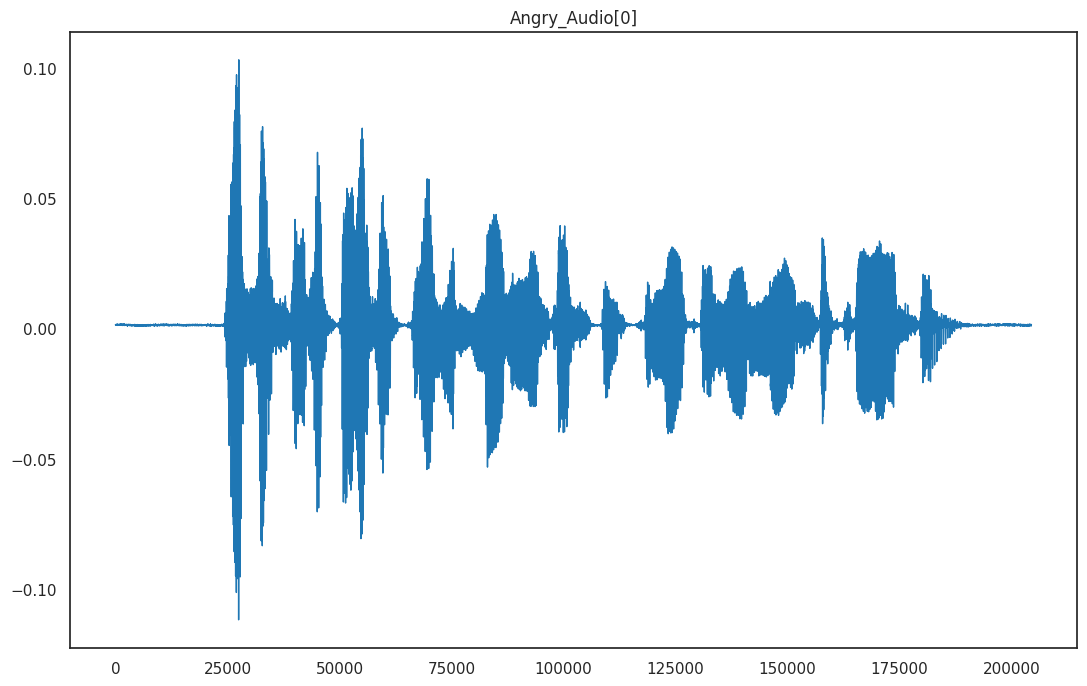

In [37]:
# plot the audio 
pd.Series(y).plot(figsize=(13,8), lw=1 ,title = "Angry_Audio[0]")
plt.show()

**Spectrogram visualization**

In [38]:
spectro = librosa.stft(y)
sp = librosa.amplitude_to_db(np.abs(spectro), ref=np.max)
sp.shape

(1025, 400)

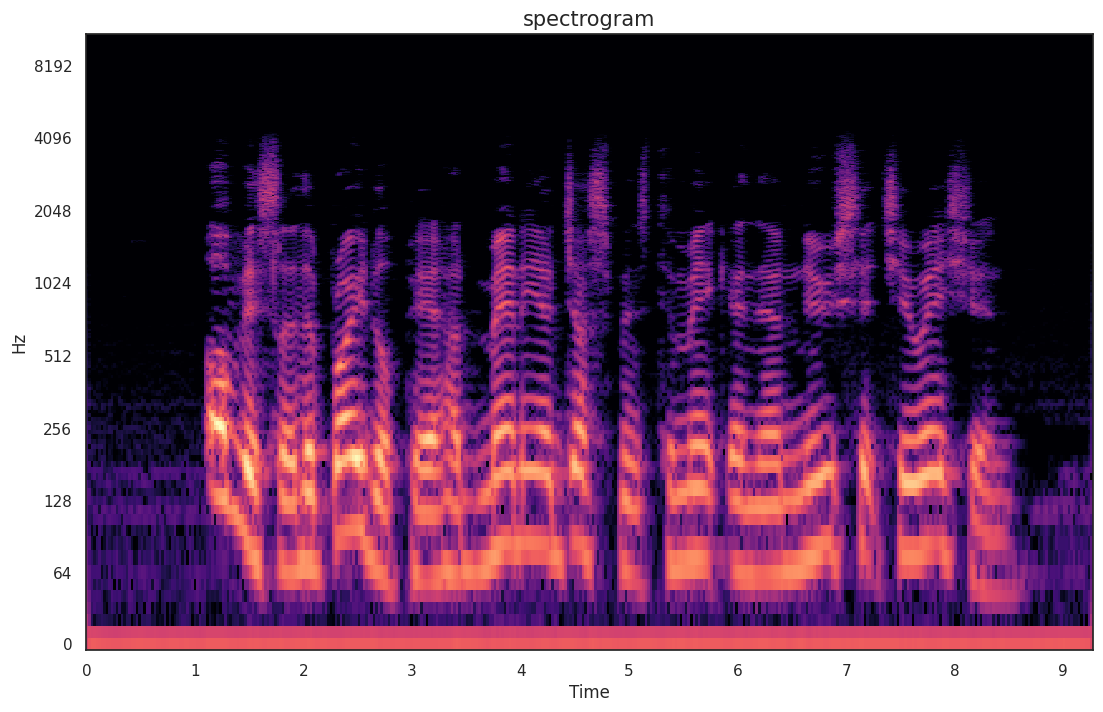

In [39]:
fig ,ax = plt.subplots(figsize=(13,8))
img = librosa.display.specshow(sp,x_axis="time",y_axis="log",ax=ax)
ax.set_title("spectrogram",fontsize=15)
plt.show()

**Mel-Spectrogram visualization**

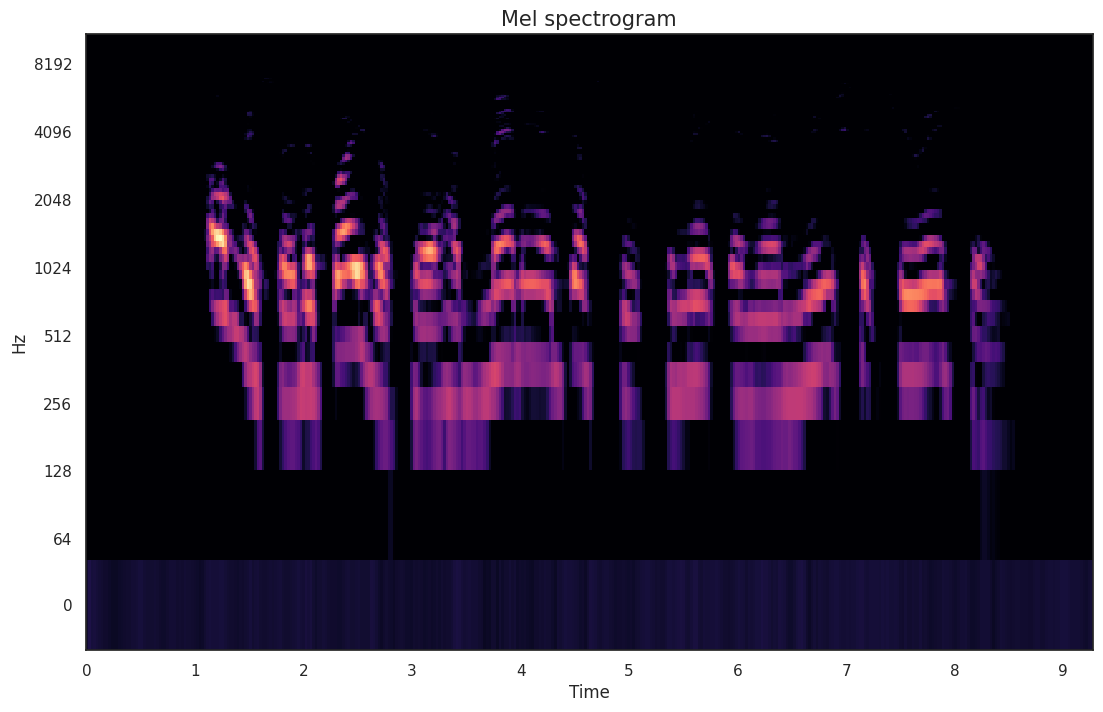

In [40]:
sspectro = librosa.feature.melspectrogram(y=y , sr = sr, n_mels =128)
sp_mel = librosa.amplitude_to_db(np.abs(sspectro), ref=np.max)

fig ,ax = plt.subplots(figsize=(13,8))
img = librosa.display.specshow(sp_mel,x_axis="time",y_axis="log",ax=ax)
ax.set_title("Mel spectrogram",fontsize=15)
plt.show()